## Import relevant modules

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import iqr

## Iris dataset

In [2]:
iris = pd.read_csv('data/iris.csv')
iris.drop(columns=['Unnamed: 0'], inplace=True)
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Convert **Species** to categorical value.

In [5]:
iris['Species'] = iris['Species'].astype('category')

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Sepal.Length  150 non-null    float64 
 1   Sepal.Width   150 non-null    float64 
 2   Petal.Length  150 non-null    float64 
 3   Petal.Width   150 non-null    float64 
 4   Species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [7]:
iris.describe(include=['float', 'category'])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


### Categorical Variable

In [8]:
iris['Species'].unique()

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [9]:
iris['Species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: Species, dtype: int64

In [10]:
iris['Species'].value_counts(normalize=True)

virginica     0.333333
versicolor    0.333333
setosa        0.333333
Name: Species, dtype: float64

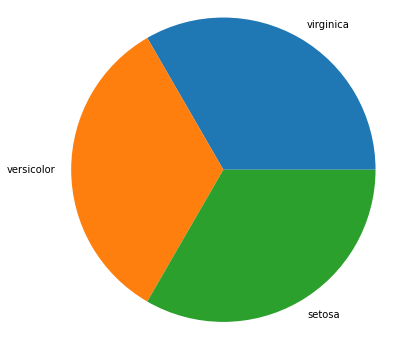

In [41]:
iris['Species'].value_counts().plot.pie(figsize=(6,6)).set_ylabel('')
plt.axis('equal');

### Central tendency - mean, median, mode

In [12]:
# Mean
iris.mean()

Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
dtype: float64

In [13]:
# Median
iris.median()

Sepal.Length    5.80
Sepal.Width     3.00
Petal.Length    4.35
Petal.Width     1.30
dtype: float64

In [14]:
# Mode
iris.mode().head(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.0,3.0,1.4,0.2,setosa


In [15]:
# Can get mean and median directly from describe()
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


General guidline for choosing best measure of central tendency:
1. If there are no outliers in the data, mean gives the best approximation as it takes into account both physical location and weights.
2. If there are outliers in the data, mean gives the best approximation as it is robust to outliers.
3. If data is categorical or invovles identifying the data point with highest occurence, use mode.

### Dispersion/Variablility - range, percentiles, variance, standard deviation

In [16]:
pl = iris.loc[:, 'Petal.Length']
pl.describe()

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: Petal.Length, dtype: float64

In [17]:
# Range
pl_range = pl.max() - pl.min()
pl_range

5.9

In [18]:
# First quartile
pl_q1 = pl.quantile(.25)
pl_q1

1.6

In [19]:
# Third quartile
pl_q3 = pl.quantile(.75)
pl_q3

5.1

In [20]:
# Interquartile range
pl_iqr = iqr(pl)
pl_iqr

3.4999999999999996

In [21]:
# Lower fence
pl_lf = pl_q1 - 1.5 * pl_iqr
pl_lf

-3.649999999999999

In [22]:
# Upper fence
pl_uf = pl_q3 + 1.5 * pl_iqr
pl_uf

10.349999999999998

In [23]:
# Outliers
pl_outliers = pl[(pl < pl_lf) | (pl > pl_uf)]
print(len(pl_outliers))
pl_outliers

0


Series([], Name: Petal.Length, dtype: float64)

In [24]:
# Variance
pl.var()

3.1162778523489942

In [25]:
# Standard deviation
pl.std()

1.7652982332594667

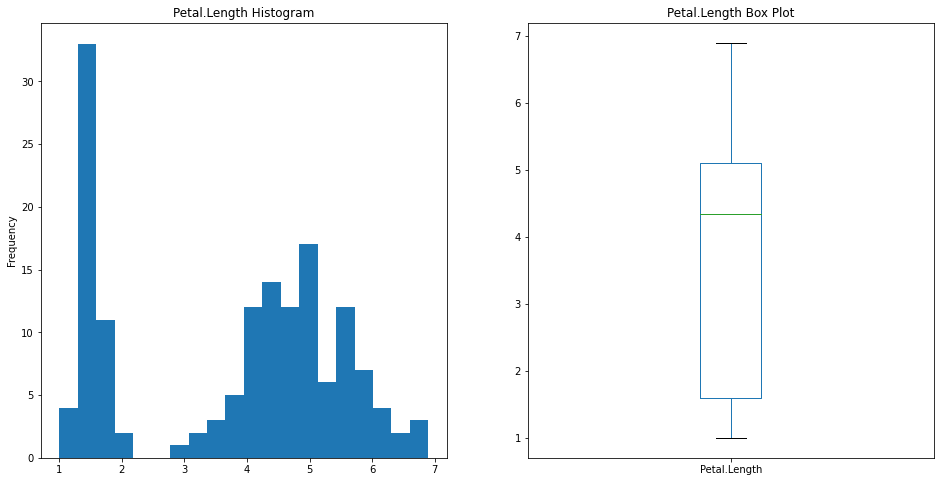

In [36]:
fg, ax = plt.subplots(ncols=2, figsize=(16, 8))
pl.plot.hist(bins=20, title="Petal.Length Histogram", ax=ax[0])
pl.plot.box(title="Petal.Length Box Plot", ax=ax[1]);

Turkey's Method - outliers are the data points which fall outside of the $1^{st}$ quartile ($Q1$) and $3^{rd}$ quartile ($Q3$) by $1.5$ times the interquartile range ($IQR$). These boundaries are known as the **lower fence** and **upper fence**, representing the outer limits of reasonable value to be included in the dataset.

$$LF = Q1 - 1.5 \times IQR$$
$$UF = Q2 + 1.5 \times IQR$$

### Examine relationship

In [27]:
iris.groupby('Species').describe().transpose()

Species                setosa  versicolor  virginica
Sepal.Length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
Sepal.Width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
Petal.Length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
Petal.Width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

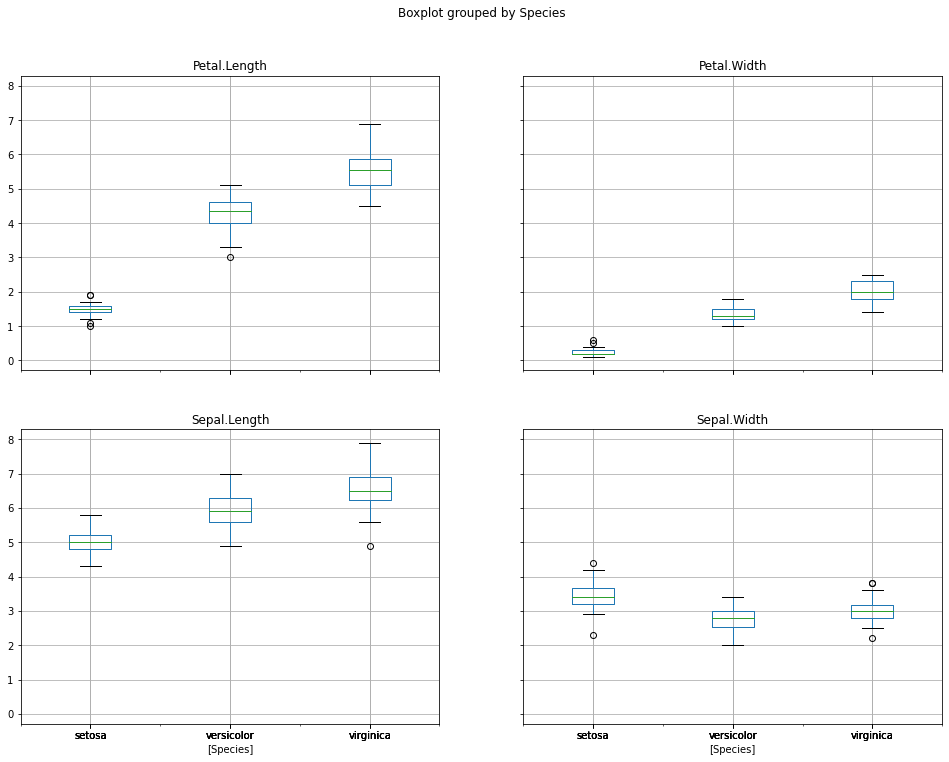

In [31]:
# Box plot
iris.boxplot(by='Species', figsize=(16,12));

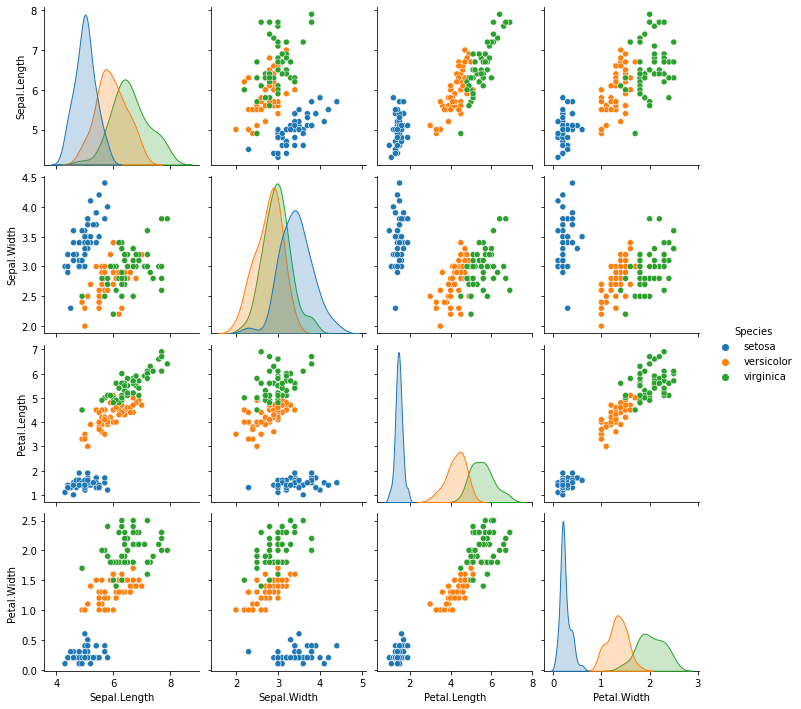

In [42]:
# Pair plot
sns.pairplot(iris, hue='Species');

## Notes

### Scatter plots

In [45]:
rng = np.random.RandomState(42)

Positive linear relationship

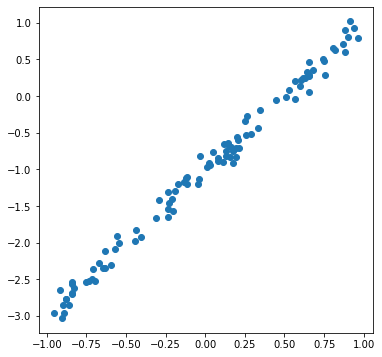

In [66]:
x = rng.uniform(low=-1, high=1, size=100)
f = lambda t: 2 * t - 1
y = f(x) + .1 * rng.normal(size=100)

plt.figure(figsize=(6,6))
plt.scatter(x, y);

Negative linear relationship

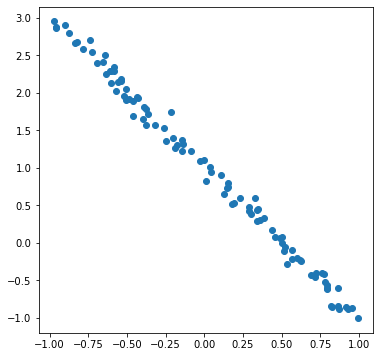

In [67]:
x = rng.uniform(low=-1, high=1, size=100)
f = lambda t: -2 * t + 1
y = f(x) + .1 * rng.normal(size=100)

plt.figure(figsize=(6,6))
plt.scatter(x, y);

No relationship

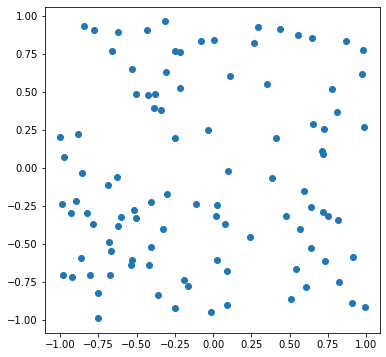

In [68]:
x = rng.uniform(low=-1, high=1, size=100)
y = rng.uniform(low=-1, high=1, size=100)

plt.figure(figsize=(6,6))
plt.scatter(x, y);

Non-linear relationship

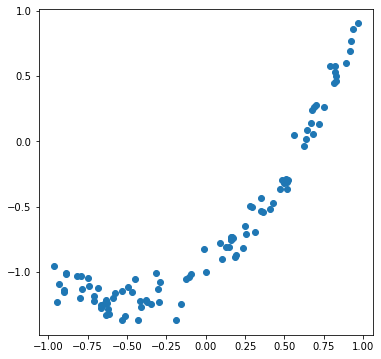

In [72]:
x = rng.uniform(low=-1, high=1, size=100)
f = lambda t: t ** 2 + t - 1
y = f(x) + .1 * rng.normal(size=100)

plt.figure(figsize=(6,6))
plt.scatter(x, y);

### Pearson's correlation coefficient

Pearson's r measures the strength of a linear relationship. For two quantitative variables $X$ and $Y$, Pearson's correlation coefficient, $corr(X,Y)$ or $r_{XY}$, measures on average how much of an increase/decrease in $X$ related to an increase/decrease in $Y$.

$$\mathrm{cor}(X,Y) = r_{XY} = \frac{\sum_i (x_i - \bar x)(y_i - \bar y)}{s_x * s_y}$$

where $\bar x$ and $\bar y$ are the means of $X$ and $Y$ respectively, and $s_x$ and $s_y$ are the standard deviation of $X$ and $Y$ respectively.

Pearson's correlation coefficient takes value within the range $[-1, 1]$, with $+1$ denoting a perfect positive linear relationship, $0$ denoting the absence of any relationship, and $-1$ denoting a perfect negative linear relationship.

| Strength of Relationship | Correlation |
|:------------------------:|:-----------:|
| Very weak                | 0.01 - 0.20 |
| Weak                     | 0.21 - 0.40 |
| Moderate                 | 0.41 - 0.60 |
| Strong                   | 0.61 - 0.80 |
| Very strong              | 0.81 - 0.99 |

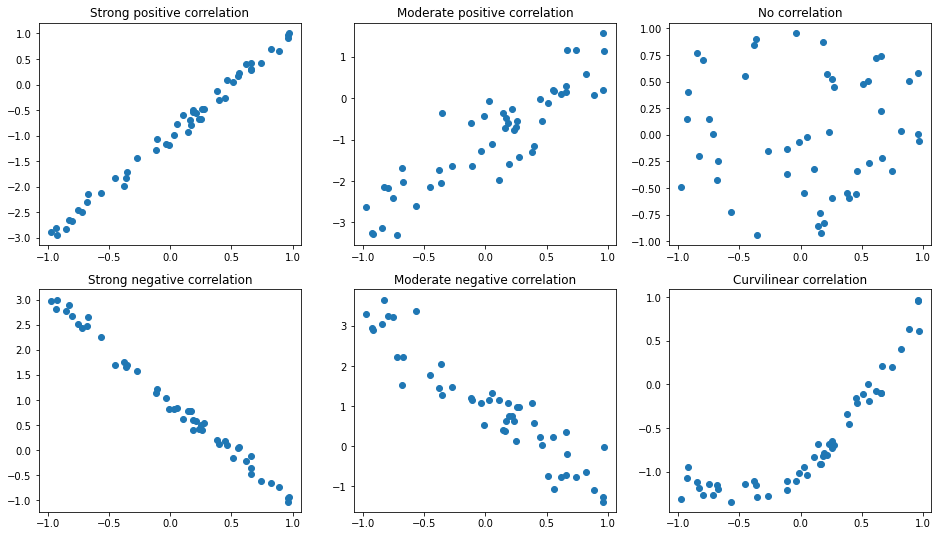

In [83]:
x = rng.uniform(low=-1, high=1, size=50)
fp = lambda t: 2 * t - 1
fn = lambda t: -2 * t + 1
fc = lambda t: t ** 2 + t - 1
y1 = fp(x) + .1 * rng.normal(size=50)
y2 = fp(x) + .5 * rng.normal(size=50)
y3 = rng.uniform(low=-1, high=1, size=50)
y4 = fn(x) + .1 * rng.normal(size=50)
y5 = fn(x) + .5 * rng.normal(size=50)
y6 = fc(x) + .1 * rng.normal(size=50)

fg, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 9))
ax[0,0].scatter(x, y1)
ax[0,0].set_title("Strong positive correlation")
ax[0,1].scatter(x, y2)
ax[0,1].set_title("Moderate positive correlation")
ax[0,2].scatter(x, y3)
ax[0,2].set_title("No correlation")
ax[1,0].scatter(x, y4)
ax[1,0].set_title("Strong negative correlation")
ax[1,1].scatter(x, y5)
ax[1,1].set_title("Moderate negative correlation")
ax[1,2].scatter(x, y6)
ax[1,2].set_title("Curvilinear correlation");